In [69]:
%reload_ext autoreload
%autoreload 2

In [70]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [71]:
path = Path('/home/zhang/work-fastai/course-v3/mywork/data/energy')
path.ls()

[PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/test.csv'),
 PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/weather_train.csv'),
 PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/models'),
 PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/building_metadata.csv'),
 PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/train.csv'),
 PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/sample_submission.csv'),
 PosixPath('/home/zhang/work-fastai/course-v3/mywork/data/energy/weather_test.csv')]

In [72]:
def logic(index):
    if index % 1000 == 0:
       return True
    return False

In [73]:
table_names = ['train', 'weather_train', 'building_metadata', 'sample_submission', 'weather_test', 'test']
'''tables = [pd.read_csv(path/f'{fname}.csv', low_memory=False, skiprows= lambda x: logic(x),nrows=2000) for fname in table_names]
'''
tables = [pd.read_csv(path/f'{fname}.csv', low_memory=False, nrows=2000) for fname in table_names]
train, weather_train, metadata, submission, weather_test, test = tables
len(train),len(test)

(2000, 2000)

In [87]:
train.describe(include='all')

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2000.000000,2000.000000,2000,2.000000e+03,2000.000000,2000,2000.000000,709.000000,401.000000,103.0,103.0,103.0,0.0,1.030000e+02,103.0,103.0
unique,NaN,NaN,1,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2000,NaN,NaN,828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,731.265500,0.626000,NaN,2.049019e+03,7.175000,NaN,110355.460000,1969.136812,4.177057,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
std,395.058619,0.931965,NaN,7.254996e+04,4.726579,NaN,122594.914285,29.692866,4.013237,0.0,0.0,0.0,NaN,1.827884e-12,0.0,0.0
min,0.000000,0.000000,NaN,0.000000e+00,0.000000,NaN,283.000000,1900.000000,1.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
25%,339.750000,0.000000,NaN,0.000000e+00,3.000000,NaN,30914.250000,1955.000000,1.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
50%,803.000000,0.000000,NaN,2.281700e+01,7.000000,NaN,72193.000000,1970.000000,3.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
75%,1084.250000,1.000000,NaN,1.201590e+02,13.000000,NaN,143414.250000,1993.000000,6.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0


In [88]:
cols = ['building_id','site_id','primary_use','year_built']
for col in cols:
    print ("Unique Values in the {} column are:".format(col),train[col].unique())
    print ("\n")

Unique Values in the building_id column are: [   0    1    2    3 ... 1296 1297 1298 1299]


Unique Values in the site_id column are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


Unique Values in the primary_use column are: ['Education' 'Lodging/residential' 'Office' 'Entertainment/public assembly' 'Other' 'Retail' 'Parking'
 'Public services' 'Warehouse/storage' 'Food sales and service' 'Religious worship' 'Healthcare' 'Utility'
 'Technology/science' 'Manufacturing/industrial' 'Services']


Unique Values in the year_built column are: [2008. 2004. 1991. 2002. ... 1994. 1933. 1945. 1938.]




In [74]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [75]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [76]:
metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [77]:
submission.head()

,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [78]:
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


### Preprocessing

In [79]:
train = pd.merge(train,metadata,on='building_id',how='left')
test  = pd.merge(test,metadata,on='building_id',how='left')

In [80]:
train = pd.merge(train,weather_train,on=['site_id','timestamp'],how='left')
test  = pd.merge(test,weather_test,on=['site_id','timestamp'],how='left')

In [81]:
# train["timestamp"] = pd.to_datetime(train["timestamp"], format='%Y-%m-%d %H:%M:%S')
# test["timestamp"] = pd.to_datetime(test["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [82]:
'''def preprocess(df):
    df["hour"] = df["timestamp"].dt.hour
#     df["day"] = df["timestamp"].dt.day
    df["weekend"] = df["timestamp"].dt.weekday
    df["month"] = df["timestamp"].dt.month
    df["dayofweek"] = df["timestamp"].dt.dayofweek

#     hour_rad = df["hour"].values / 24. * 2 * np.pi
#     df["hour_sin"] = np.sin(hour_rad)
#     df["hour_cos"] = np.cos(hour_rad)
'''

'def preprocess(df):\n    df["hour"] = df["timestamp"].dt.hour\n#     df["day"] = df["timestamp"].dt.day\n    df["weekend"] = df["timestamp"].dt.weekday\n    df["month"] = df["timestamp"].dt.month\n    df["dayofweek"] = df["timestamp"].dt.dayofweek\n\n#     hour_rad = df["hour"].values / 24. * 2 * np.pi\n#     df["hour_sin"] = np.sin(hour_rad)\n#     df["hour_cos"] = np.cos(hour_rad)\n'

In [83]:
# preprocess(train)

In [84]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [86]:
train.describe(include='all')

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2000.000000,2000.000000,2000,2.000000e+03,2000.000000,2000,2000.000000,709.000000,401.000000,103.0,103.0,103.0,0.0,1.030000e+02,103.0,103.0
unique,NaN,NaN,1,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2000,NaN,NaN,828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,731.265500,0.626000,NaN,2.049019e+03,7.175000,NaN,110355.460000,1969.136812,4.177057,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
std,395.058619,0.931965,NaN,7.254996e+04,4.726579,NaN,122594.914285,29.692866,4.013237,0.0,0.0,0.0,NaN,1.827884e-12,0.0,0.0
min,0.000000,0.000000,NaN,0.000000e+00,0.000000,NaN,283.000000,1900.000000,1.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
25%,339.750000,0.000000,NaN,0.000000e+00,3.000000,NaN,30914.250000,1955.000000,1.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
50%,803.000000,0.000000,NaN,2.281700e+01,7.000000,NaN,72193.000000,1970.000000,3.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0
75%,1084.250000,1.000000,NaN,1.201590e+02,13.000000,NaN,143414.250000,1993.000000,6.000000,25.0,6.0,20.0,NaN,1.019700e+03,0.0,0.0


In [55]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [56]:
train = reduce_mem_usage(train)

Mem. usage decreased to  0.11 Mb (55.9% reduction)


In [57]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [58]:
add_datepart(train, "timestamp", drop=False)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,timestampDay,timestampDayofweek,timestampDayofyear,timestampIs_month_end,timestampIs_month_start,timestampIs_quarter_end,timestampIs_quarter_start,timestampIs_year_end,timestampIs_year_start,timestampElapsed
0,0,0,2016-01-01,0.000000,0,Education,7432,2008.0,NaN,25.0,...,1,4,1,False,True,False,True,False,True,1451606400
1,1,0,2016-01-01,0.000000,0,Education,2720,2004.0,NaN,25.0,...,1,4,1,False,True,False,True,False,True,1451606400
2,2,0,2016-01-01,0.000000,0,Education,5376,1991.0,NaN,25.0,...,1,4,1,False,True,False,True,False,True,1451606400
3,3,0,2016-01-01,0.000000,0,Education,23685,2002.0,NaN,25.0,...,1,4,1,False,True,False,True,False,True,1451606400
4,4,0,2016-01-01,0.000000,0,Education,116607,1975.0,NaN,25.0,...,1,4,1,False,True,False,True,False,True,1451606400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1298,2,2016-01-01,2334.989990,14,Education,171084,NaN,NaN,NaN,...,1,4,1,False,True,False,True,False,True,1451606400
1996,1298,3,2016-01-01,0.000000,14,Education,171084,NaN,NaN,NaN,...,1,4,1,False,True,False,True,False,True,1451606400
1997,1299,0,2016-01-01,43.675499,14,Education,25401,NaN,NaN,NaN,...,1,4,1,False,True,False,True,False,True,1451606400
1998,1299,1,2016-01-01,260.216003,14,Education,25401,NaN,NaN,NaN,...,1,4,1,False,True,False,True,False,True,1451606400


In [59]:
add_datepart(test, "timestamp", drop=False)

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,timestampDay,timestampDayofweek,timestampDayofyear,timestampIs_month_end,timestampIs_month_start,timestampIs_quarter_end,timestampIs_quarter_start,timestampIs_year_end,timestampIs_year_start,timestampElapsed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.8,...,1,6,1,False,True,False,True,False,True,1483228800
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.8,...,1,6,1,False,True,False,True,False,True,1483228800
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.8,...,1,6,1,False,True,False,True,False,True,1483228800
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.8,...,1,6,1,False,True,False,True,False,True,1483228800
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.8,...,1,6,1,False,True,False,True,False,True,1483228800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,50,0,2017-01-01 15:00:00,0,Other,4698,1981.0,NaN,22.8,...,1,6,1,False,True,False,True,False,True,1483282800
1996,1996,50,1,2017-01-01 15:00:00,0,Other,4698,1981.0,NaN,22.8,...,1,6,1,False,True,False,True,False,True,1483282800
1997,1997,51,0,2017-01-01 15:00:00,0,Parking,387638,2014.0,NaN,22.8,...,1,6,1,False,True,False,True,False,True,1483282800
1998,1998,52,0,2017-01-01 15:00:00,0,Education,106523,1970.0,NaN,22.8,...,1,6,1,False,True,False,True,False,True,1483282800


In [60]:
cat_vars = ['building_id','meter','site_id','primary_use','wind_direction','timestampDay','timestampDayofweek','timestampDayofyear','timestampIs_month_end','timestampIs_month_start']
cont_vars = ['square_feet','year_built','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_speed']
dep_var = ['meter_reading']

In [61]:
train_temp=train
fill_missing = FillMissing(cat_vars, cont_vars)
fill_missing(train_temp)
train_temp.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,timestampIs_year_start,timestampElapsed,year_built_na,floor_count_na,air_temperature_na,cloud_coverage_na,dew_temperature_na,precip_depth_1_hr_na,sea_level_pressure_na,wind_speed_na
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,3.0,25.0,...,True,1451606400,False,True,False,False,False,True,False,False
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,3.0,25.0,...,True,1451606400,False,True,False,False,False,True,False,False
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,3.0,25.0,...,True,1451606400,False,True,False,False,False,True,False,False
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,3.0,25.0,...,True,1451606400,False,True,False,False,False,True,False,False
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,3.0,25.0,...,True,1451606400,False,True,False,False,False,True,False,False


In [62]:
procs=[FillMissing, Categorify, Normalize]
data = (TabularList.from_df(train, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
.split_by_idx(valid_idx=range(len(train)-200,len(train)))
.label_from_df(cols=dep_var, label_cls=FloatList)
.databunch())


## Model

In [63]:
max_log_y = np.log(np.max(train['meter_reading'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [64]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [65]:
len(data.train_ds.cont_names)

9

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


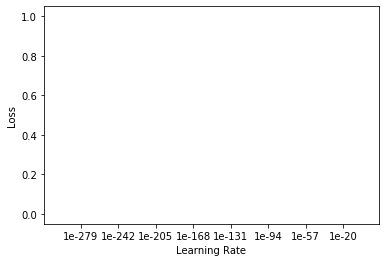

In [67]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,5088120832.000000,nan,nan,00:01
1,4718135808.000000,nan,nan,00:01
2,5384693248.000000,nan,nan,00:01
3,5500752384.000000,nan,nan,00:01
4,5406530048.000000,nan,nan,00:01


In [ ]:
learn.save('1')

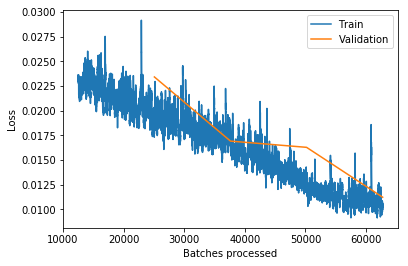

In [ ]:
learn.recorder.plot_losses(last=-1)

In [ ]:
learn.load('1');

In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012223,0.014312,0.116988
2,0.012001,0.017789,0.117619
3,0.011402,0.035596,0.114396
4,0.010067,0.015125,0.113652
5,0.009148,0.031326,0.116344


In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.011840,0.013236,0.110483
2,0.010765,0.057664,0.129586
3,0.010101,0.042744,0.111584
4,0.008820,0.116893,0.135458
5,0.009144,0.017969,0.126323


(10th place in the competition was 0.108)

In [ ]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)